# Step 2: Data Analysis and Preprocessing

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


### Load the Dataset

In [2]:
# Load the wine quality dataset (Red Wine)
df = pd.read_csv('../data/WineQT.csv')




### Initial Exploration (EDA)

In [3]:
# Show the first 5 rows
# Preview first few rows
print(df.head())

# Dataset info
print(df.info())

# Check column data types and non-null counts
print(df.describe())

# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

### Check Missing Values

In [4]:
# Count missing values
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


### 🔸 Distribution of Quality

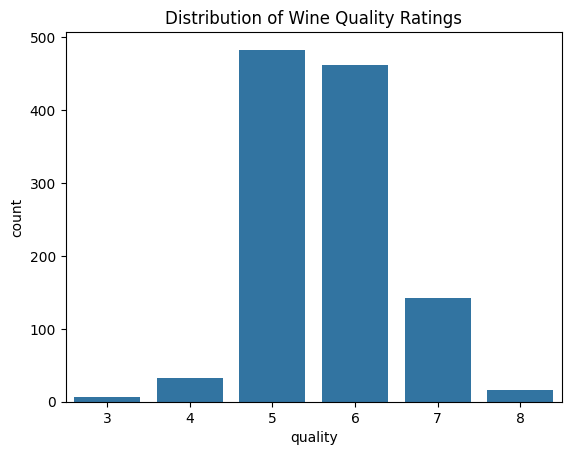

In [5]:
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality Ratings")
plt.show()


### 🔸 Correlation Heatmap

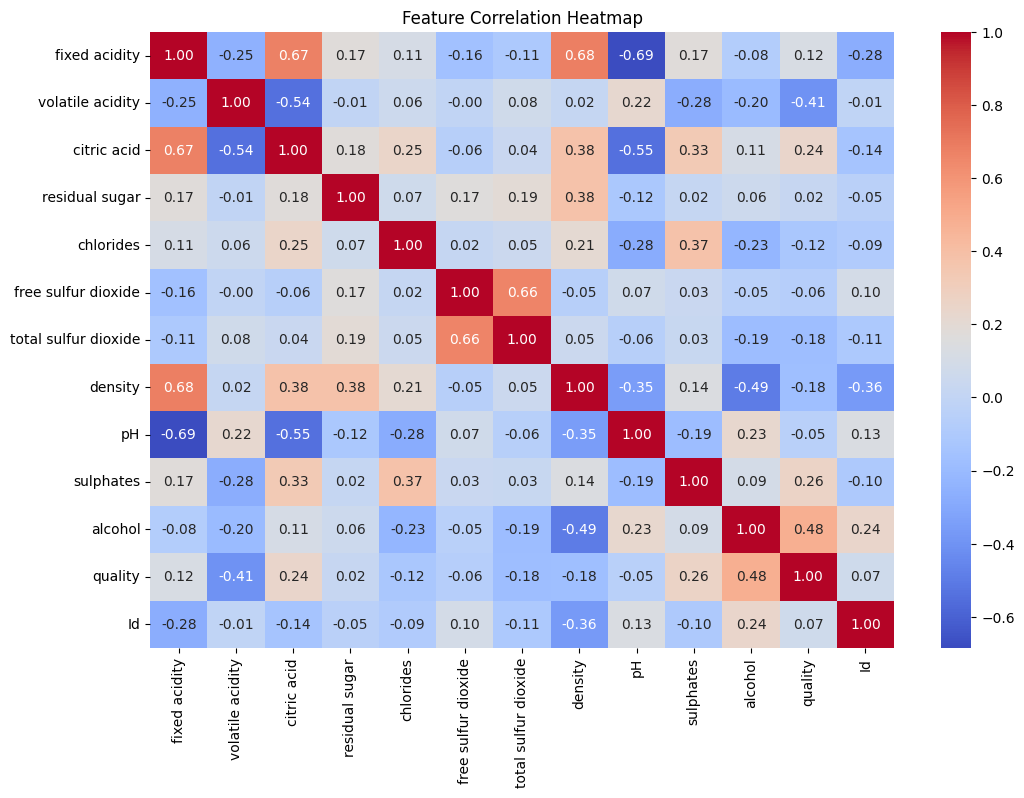

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


### 🔸Pairplot (optional for small data)

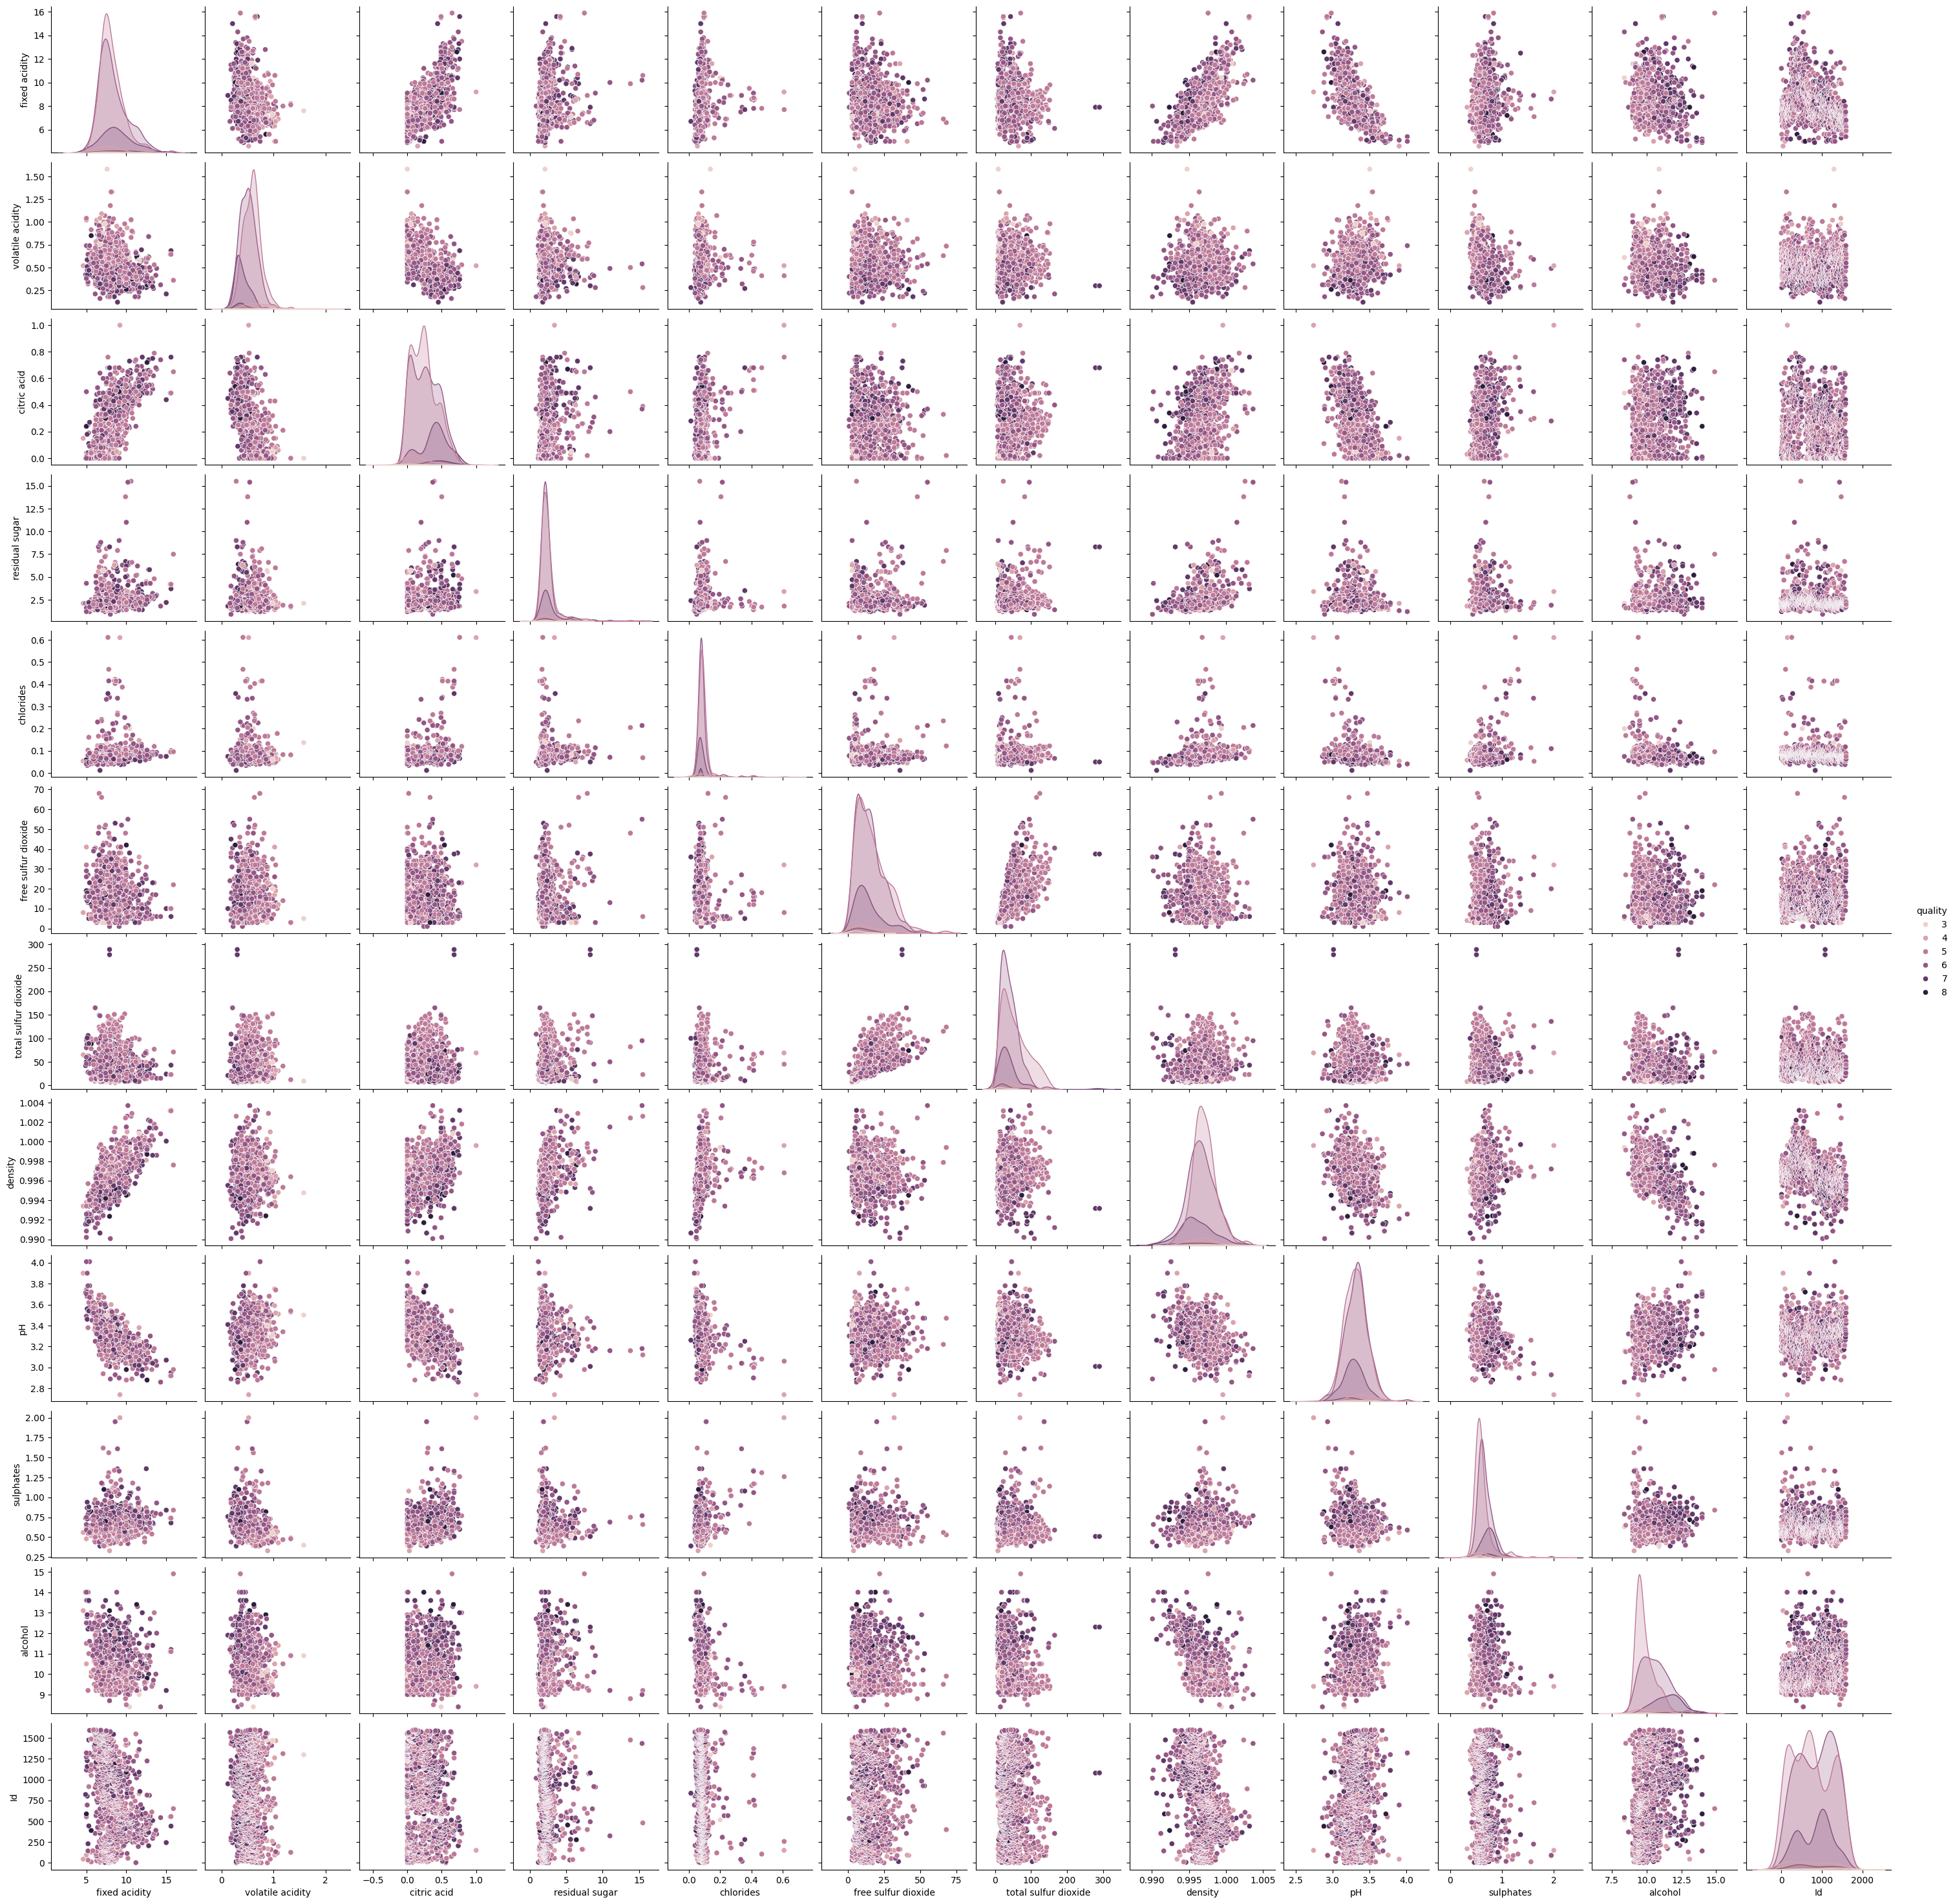

In [7]:
sns.pairplot(df, hue='quality')


### 🔸 Alcohol vs Quality

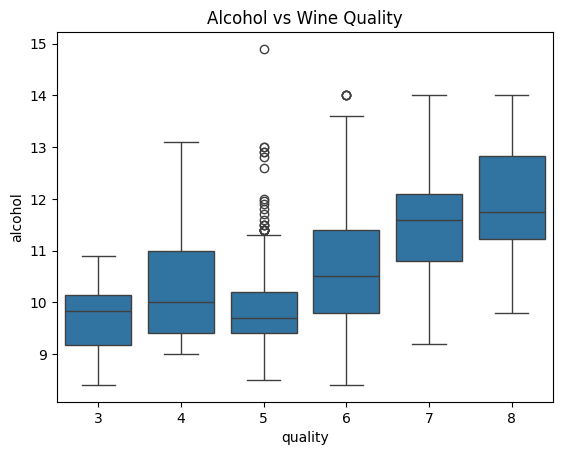

In [8]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol vs Wine Quality")
plt.show()


### Feature Engineering (Optional but Recommended)

In [9]:
#Convert quality into classification labels:

df['quality_label'] = df['quality'].apply(lambda q: 'good' if q >= 7 else 'bad')


In [10]:
#Encode the labels:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['quality_label'] = label_encoder.fit_transform(df['quality_label'])  # bad=0, good=1


In [11]:
#Drop unnecessary columns:
df.drop(['quality', 'Id'], axis=1, inplace=True)  # remove 'quality' and ID


### Split Dataset into Train and Test Sets

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('quality_label', axis=1)
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# step 3 : Model Training


### Import Required Libraries

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


### Train the Models

#### Random Forest Classifier

In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)


#### Logistic Regression

In [15]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(X_test)


### Cross-Validation for Evaluation

In [16]:
# Cross-validation scores
rf_cv = cross_val_score(rf_model, X, y, cv=5)
lr_cv = cross_val_score(lr_model, X, y, cv=5)

print("Random Forest CV Accuracy: ", rf_cv.mean())
print("Logistic Regression CV Accuracy: ", lr_cv.mean())


Random Forest CV Accuracy:  0.8687504788171303
Logistic Regression CV Accuracy:  0.869623841262545


### Model Performance Metrics

In [17]:
# Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       197
           1       0.79      0.59      0.68        32

    accuracy                           0.92       229
   macro avg       0.86      0.78      0.82       229
weighted avg       0.92      0.92      0.92       229

Random Forest Confusion Matrix:
 [[192   5]
 [ 13  19]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       197
           1       0.57      0.25      0.35        32

    accuracy                           0.87       229
   macro avg       0.73      0.61      0.64       229
weighted avg       0.84      0.87      0.85       229

Logistic Regression Confusion Matrix:
 [[191   6]
 [ 24   8]]


### Save the Best Model (Final)

In [19]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import joblib

# Load your training data
data = pd.read_csv("../data/WineQT.csv")
  # adjust path
X = data.drop("quality", axis=1)
y = data["quality"]

# Train model
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Save model
joblib.dump(rf_model, "../model.pkl")
print("Model saved as model.pkl")


Model saved as model.pkl
